# 一起来打怪之 Credit Scoring 练习

---
## 作业说明

- 答题步骤：
    - 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
    - 请养成代码注释的好习惯

- 解题思路：
    - 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
    - 解题思路**仅供参考**，鼓励原创解题方法
    - 为督促同学们自己思考，解题思路内容设置为**白色**，必要时请从冒号后拖动鼠标查看

- 所用数据
    - 请注意导入数据库后先**查看和了解数据的基本性质**，后面的问题不再一一提醒

## machine learning for credit scoring


Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years. [Dataset](https://www.kaggle.com/c/GiveMeSomeCredit)

Attribute Information:

|Variable Name	|	Description	|	Type|
|----|----|----|
|SeriousDlqin2yrs	|	Person experienced 90 days past due delinquency or worse 	|	Y/N|
|RevolvingUtilizationOfUnsecuredLines	|	Total balance on credit divided by the sum of credit limits	|	percentage|
|age	|	Age of borrower in years	|	integer|
|NumberOfTime30-59DaysPastDueNotWorse	|	Number of times borrower has been 30-59 days past due |	integer|
|DebtRatio	|	Monthly debt payments	|	percentage|
|MonthlyIncome	|	Monthly income	|	real|
|NumberOfOpenCreditLinesAndLoans	|	Number of Open loans |	integer|
|NumberOfTimes90DaysLate	|	Number of times borrower has been 90 days or more past due.	|	integer|
|NumberRealEstateLoansOrLines	|	Number of mortgage and real estate loans	|	integer|
|NumberOfTime60-89DaysPastDueNotWorse	|	Number of times borrower has been 60-89 days past due |integer|
|NumberOfDependents	|	Number of dependents in family	|	integer|


----------
## Read the data into Pandas 

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0) # index_col=0参数指定第一列数据作为行索引。
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [2]:
data.shape

(112915, 11)

In [3]:
data.info

<bound method DataFrame.info of         SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines   age  \
0                      1                              0.766127  45.0   
1                      0                              0.957151  40.0   
2                      0                              0.658180  38.0   
3                      0                              0.233810  30.0   
4                      0                              0.907239  49.0   
...                  ...                                   ...   ...   
112910                 0                              0.385742  50.0   
112911                 0                              0.040674  74.0   
112912                 0                              0.299745  44.0   
112913                 0                              0.000000  30.0   
112914                 0                              0.850283  64.0   

        NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                            

------------
## Drop na

In [4]:
data.isnull().sum(axis=0) # 用来统计DataFrame中每列的缺失值（null或NaN）数量

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [5]:
data.dropna(inplace=True) # 直接在原始的 data DataFrame中删除包含缺失值的行
data.shape

(108648, 11)

---------
## Create X and y

In [6]:
y = data['SeriousDlqin2yrs'] # 逾期 90 天或更严重的人
X = data.drop('SeriousDlqin2yrs', axis=1) 

In [7]:
y.mean()

0.06742876076872101

---
## 练习1：把数据切分成训练集和测试集
- 提示：<span style='color:white'>from sklearn.model_selection import train_test_split('Gender') </span>

In [8]:
# 分割为训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)
    # test_size=0.3表示测试集的比例为30%的数据，剩余的70%则为训练集。
    # shuffle=True表示在分割前将数据进行随机打乱。这是一个好习惯，特别是如果数据在加载时有任何顺序（比如排序或分组）。
    # random_state=0设定了一个随机数种子，确保每次分割的结果都是一样的，这对于可重复性实验是很重要的。

# 查看数据的维度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((76053, 10), (32595, 10), (76053,), (32595,))

----
## 练习2：使用logistic regression/决策树/SVM/KNN...等sklearn分类算法进行分类
尝试查sklearn API了解模型参数含义，调整不同的参数

### 2.0 标准化 (如果不先标准化，可能会导致模型不收敛）

In [9]:
# 对特征做标准化
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  # 对数据的每一列做了一个归一化
sc.fit(X_train)

StandardScaler()

In [10]:
# Check

print(sc.mean_, sc.scale_)

np.mean(X_train, axis=0), np.std(X_train, axis=0)

[6.24891681e+00 5.13431291e+01 3.82141401e-01 3.05889733e-01
 6.96329249e+03 8.67997318e+00 2.15875771e-01 1.01193904e+00
 1.91761009e-01 8.57415224e-01] [2.73361312e+02 1.44369533e+01 3.57454381e+00 2.22787954e-01
 1.58054741e+04 5.12814227e+00 3.54201626e+00 1.07201391e+00
 3.52622942e+00 1.15264795e+00]


(RevolvingUtilizationOfUnsecuredLines       6.248917
 age                                       51.343129
 NumberOfTime30-59DaysPastDueNotWorse       0.382141
 DebtRatio                                  0.305890
 MonthlyIncome                           6963.292493
 NumberOfOpenCreditLinesAndLoans            8.679973
 NumberOfTimes90DaysLate                    0.215876
 NumberRealEstateLoansOrLines               1.011939
 NumberOfTime60-89DaysPastDueNotWorse       0.191761
 NumberOfDependents                         0.857415
 dtype: float64,
 RevolvingUtilizationOfUnsecuredLines      273.361312
 age                                        14.436953
 NumberOfTime30-59DaysPastDueNotWorse        3.574544
 DebtRatio                                   0.222788
 MonthlyIncome                           15805.474141
 NumberOfOpenCreditLinesAndLoans             5.128142
 NumberOfTimes90DaysLate                     3.542016
 NumberRealEstateLoansOrLines                1.072014
 NumberOfTime60-89Day

In [11]:
# 标准化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Logistic regression
- 提示：<span style='color:white'>from sklearn import linear_model('Gender') </span>

In [12]:
## 用 LogisticRegression 进行分类 （如果不先标准化，可能会导致模型不收敛）
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression()
model_LR.fit(X_train_std, y_train)

LogisticRegression()

### Decision Tree
- 提示：<span style='color:white'>from sklearn.tree import DecisionTreeClassifier('Gender') </span>

In [13]:
## 用 DecisionTreeClassifier 进行分类 （如果不先标准化，可能会导致模型不收敛）
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_std, y_train)

DecisionTreeClassifier()

### Random Forest
- 提示：<span style='color:white'>from sklearn.ensemble import RandomForestClassifier('Gender') </span>

In [14]:
## 用 RandomForestClassifier 进行分类 （如果不先标准化，可能会导致模型不收敛）
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier()
model_RF.fit(X_train_std, y_train)

RandomForestClassifier()

### SVM
- 提示：<span style='color:white'>from sklearn.svm import SVC('Gender') </span>

In [15]:
## 用 SVM 进行分类 （如果不先标准化，可能会导致模型不收敛）
from sklearn.svm import SVC

model_SVM = SVC(kernel='linear', C=1.0, probability=True) # 在SVM中，概率估计不是由默认的学习过程提供的，而是使用了一个额外的逻辑回归（在内部进行5折交叉验证）来拟合SVM的分数，以提供概率估计。这会增加额外的计算成本，因此默认情况下不开启。
model_SVM.fit(X_train_std, y_train)

SVC(kernel='linear', probability=True)

### KNN
- 提示：<span style='color:white'>from sklearn.neighbors import KNeighborsClassifier('Gender') </span>

In [16]:
## 用 KNN 进行分类 （如果不先标准化，可能会导致模型不收敛）
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier() # n_neighbors=5
model_KNN.fit(X_train_std, y_train)

KNeighborsClassifier()

---

## 练习3：在测试集上进行预测，计算准确度

In [17]:
# 先导入 accuracy_score
from sklearn.metrics import accuracy_score

### Logistic regression
- 提示：<span style='color:white'>y_pred_LR = clf_LR.predict(x_test)('Gender') </span>

In [18]:
# 计算预测值
pred_LR = model_LR.predict(X_test_std)

# 计算准确度
acc_LR = accuracy_score(y_test, pred_LR)
print(f"Model accuracy: {acc_LR*100:.2f}%")

Model accuracy: 93.38%


### Decision Tree
- 提示：<span style='color:white'>y_pred_tree = tree.predict(x_test)('Gender') </span>

In [19]:
# 计算预测值
pred_DT = model_DT.predict(X_test_std)

# 计算准确度
acc_DT = accuracy_score(y_test, pred_DT)
print(f"Model accuracy: {acc_DT*100:.2f}%")

Model accuracy: 89.31%


### Random Forest
- 提示：<span style='color:white'>y_pred_forest = forest.predict(x_test)('Gender') </span>

In [20]:
# 计算预测值
pred_RF = model_RF.predict(X_test_std)

# 计算准确度
acc_RF = accuracy_score(y_test, pred_RF)
print(f"Model accuracy: {acc_RF*100:.2f}%")

Model accuracy: 93.51%


### SVM
- 提示：<span style='color:white'>y_pred_SVC = clf_svc.predict(x_test)('Gender') </span>

In [21]:
# 计算预测值
pred_SVM = model_SVM.predict(X_test_std)

# 计算准确度
acc_SVM = accuracy_score(y_test, pred_SVM)
print(f"Model accuracy: {acc_SVM*100:.2f}%")

Model accuracy: 93.35%


### KNN
- 提示：<span style='color:white'>y_pred_KNN = neigh.predict(x_test)('Gender') </span>

In [22]:
# 计算预测值
pred_KNN = model_KNN.predict(X_test_std)

# 计算准确度
acc_KNN = accuracy_score(y_test, pred_KNN)
print(f"Model accuracy: {acc_KNN*100:.2f}%")

Model accuracy: 93.24%


---
## 练习4：查看sklearn的官方说明，了解分类问题的评估标准，并对此例进行评估

**混淆矩阵（Confusion Matrix）相关学习链接**

- Blog:<br>
http://blog.csdn.net/vesper305/article/details/44927047<br>
- WiKi:<br>
http://en.wikipedia.org/wiki/Confusion_matrix<br>
- sklearn doc:<br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [23]:
## 导入相关库
from sklearn.metrics import confusion_matrix

# 分别计算 Confusion Matrix 并 print

# Logistic regression
cm_LR = confusion_matrix(y_test, pred_LR)
print("Logistic Regression:\n", cm_LR)

# Decision Tree
cm_DT = confusion_matrix(y_test, pred_DT)
print("Decision Tree:\n", cm_DT)

# Random Forest
cm_RF = confusion_matrix(y_test, pred_RF)
print("Random Forest:\n", cm_RF)

# SVM
cm_SVM = confusion_matrix(y_test, pred_SVM)
print("SVM:\n", cm_SVM)

# KNN
cm_KNN = confusion_matrix(y_test, pred_KNN)
print("KNN:\n", cm_KNN)

Logistic Regression:
 [[30350    74]
 [ 2083    88]]
Decision Tree:
 [[28505  1919]
 [ 1567   604]]
Random Forest:
 [[30118   306]
 [ 1808   363]]
SVM:
 [[30406    18]
 [ 2151    20]]
KNN:
 [[30141   283]
 [ 1922   249]]


In [24]:
# 进行评估

# 将 Confusion Matrix 和模型名称分别放到一块，方便使用
cms = [cm_LR, cm_DT, cm_RF, cm_SVM, cm_KNN]
models = ["Logistic Regression","Decision Tree","Random Forest","SVM","KNN"]

# 初始化一个空的列表，用于存储每个模型的评估指标
evaluations = []

# 循环计算指标
for i, cm in enumerate(cms):
    
    # 计算真阳性TP, 真阴性TN, 假阳性FP, 假阴性FN
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    # accuracy
    ACC = (TP + TN) / (TP + TN + FP + FN)

    # true positive rate or recall
    TPR = TP / (TP + FN)

    # true negative rate
    TNR = TN / (TN + FP)
    
    # positive prediction value or positive
    PPV = TP / (TP + FP)
    
    # negative predictive value
    NPV = TN / (TN + FN)
    
    # false positive rate
    FPR = FP / (FP + TN) 
    
    # false discovery rate
    FDR = FP / (TP + FP)

    # false negative rate
    FNR = FN / (FN + TP)
    
    # F1 score
    F1 = 2 * PPV * TPR / (PPV + TPR)

    # 将结果添加到列表中
    evaluations.append({
        'Model': models[i],
        'Accuracy': ACC,
        'F1 Score(β=1)': F1,
        'True positive rate': TPR,
        'True negative rate': TNR,
        'Positive prediction value': PPV,
        'Negative predictive value': NPV,
        'False positive rate': FPR,
        'False discovery rate': FDR,
        'False negative rate': FDR,
    })

# 打印表格
print(pd.DataFrame(evaluations))
print("比较关心的指标：")
pd.DataFrame(evaluations)[['Model', 'Accuracy', 'Positive prediction value', 'True positive rate', 'F1 Score(β=1)']]

                 Model  Accuracy  F1 Score(β=1)  True positive rate  \
0  Logistic Regression  0.933824       0.075439            0.040534   
1        Decision Tree  0.893051       0.257350            0.278213   
2        Random Forest  0.935143       0.255634            0.167204   
3                  SVM  0.933456       0.018108            0.009212   
4                  KNN  0.932352       0.184240            0.114694   

   True negative rate  Positive prediction value  Negative predictive value  \
0            0.997568                   0.543210                   0.935775   
1            0.936925                   0.239398                   0.947892   
2            0.989942                   0.542601                   0.943369   
3            0.999408                   0.526316                   0.933931   
4            0.990698                   0.468045                   0.940056   

   False positive rate  False discovery rate  False negative rate  
0             0.002432        

,Model,Accuracy,Positive prediction value,True positive rate,F1 Score(β=1)
0,Logistic Regression,0.933824,0.543210,0.040534,0.075439
1,Decision Tree,0.893051,0.239398,0.278213,0.257350
2,Random Forest,0.935143,0.542601,0.167204,0.255634
3,SVM,0.933456,0.526316,0.009212,0.018108
4,KNN,0.932352,0.468045,0.114694,0.184240


**结论：**
1. Decision Tree 模型虽然准确度、精确度（PPV）都不及其它四种模型，但是它的灵敏度（TPR）和 F1 分数高，最符合“宁可误判一百个，也不可放过一个”的选择，更有利于保护银行的资产。
2. Logistic Regression 和 SVM 模型虽然精确度、准确度都位居前三，但它们的灵敏度太低，不利于保护银行的资产。
3. 剩下的 Random Forest 和 KNN 性能相对比较均衡，而 Random Forest 相对更好，<u>**因此最终推荐使用 Random Forest 模型**。

## 练习5：调整模型的标准

银行通常会有更严格的要求，因为fraud带来的后果通常比较严重，一般我们会调整模型的标准。<br>

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”，试试看把阈值设定为0.3，再看看这时的评估指标(主要是准确率和召回率)。

- 提示：<span style='color:white'>sklearn的很多分类模型，predict_prob可以拿到预估的概率，可以根据它和设定的阈值大小去判断最终结果(分类类别)('Gender') </span>

In [25]:
# 设置阈值
threshold = 0.3

# 有用的数组
mods = [model_LR, model_DT, model_RF, model_SVM, model_KNN]
preds_new = []

# 循环获取预测值
for mod in mods:
    # 获取预测概率
    pred_pro = mod.predict_proba(X_test_std)[:, 1]
    # 应用阈值来获取新的预测值
    new_pred = np.where(pred_pro > threshold, 1, 0)
    preds_new.append(new_pred)

[pred_LR_new, pred_DT_new, pred_RF_new, pred_SVM_new, pred_KNN_new] = preds_new
print(preds_new)

[array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0])]


In [26]:
# 分别计算 Confusion Matrix 并 print

models = ["Logistic Regression","Decision Tree","Random Forest","SVM","KNN"]
cms_new = []

for i, pred in enumerate(preds_new):
    cm_new = confusion_matrix(y_test, pred)
    cms_new.append(cm_new)
    print(models[i], ":\n", cm_new)

Logistic Regression :
 [[30205   219]
 [ 1945   226]]
Decision Tree :
 [[28505  1919]
 [ 1567   604]]
Random Forest :
 [[29186  1238]
 [ 1315   856]]
SVM :
 [[30406    18]
 [ 2151    20]]
KNN :
 [[29403  1021]
 [ 1614   557]]


In [27]:
# 进行评估

# 初始化一个空的列表，用于存储每个模型的评估指标
evaluations_new = []

# 循环计算指标
for i, cm in enumerate(cms_new):
    
    # 计算真阳性TP, 真阴性TN, 假阳性FP, 假阴性FN
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    # accuracy
    ACC = (TP + TN) / (TP + TN + FP + FN)

    # true positive rate or recall
    TPR = TP / (TP + FN)

    # true negative rate
    TNR = TN / (TN + FP)
    
    # positive prediction value or positive
    PPV = TP / (TP + FP)
    
    # negative predictive value
    NPV = TN / (TN + FN)
    
    # false positive rate
    FPR = FP / (FP + TN) 
    
    # false discovery rate
    FDR = FP / (TP + FP)

    # false negative rate
    FNR = FN / (FN + TP)
    
    # F1 score
    F1 = 2 * PPV * TPR / (PPV + TPR)

    # 将结果添加到列表中
    evaluations_new.append({
        'Model': models[i],
        'Accuracy': ACC,
        'F1 Score(β=1)': F1,
        'True positive rate': TPR,
        'True negative rate': TNR,
        'Positive prediction value': PPV,
        'Negative predictive value': NPV,
        'False positive rate': FPR,
        'False discovery rate': FDR,
        'False negative rate': FDR,
    })

# 打印表格
# print(pd.DataFrame(evaluations_new))
# print("比较关心的指标：")
pd.DataFrame(evaluations_new)[['Model', 'Accuracy', 'Positive prediction value', 'True positive rate', 'F1 Score(β=1)']]

,Model,Accuracy,Positive prediction value,True positive rate,F1 Score(β=1)
0,Logistic Regression,0.933609,0.507865,0.104099,0.172783
1,Decision Tree,0.893051,0.239398,0.278213,0.257350
2,Random Forest,0.921675,0.408787,0.394288,0.401407
3,SVM,0.933456,0.526316,0.009212,0.018108
4,KNN,0.919159,0.352978,0.256564,0.297146


**阈值=0.5时：**

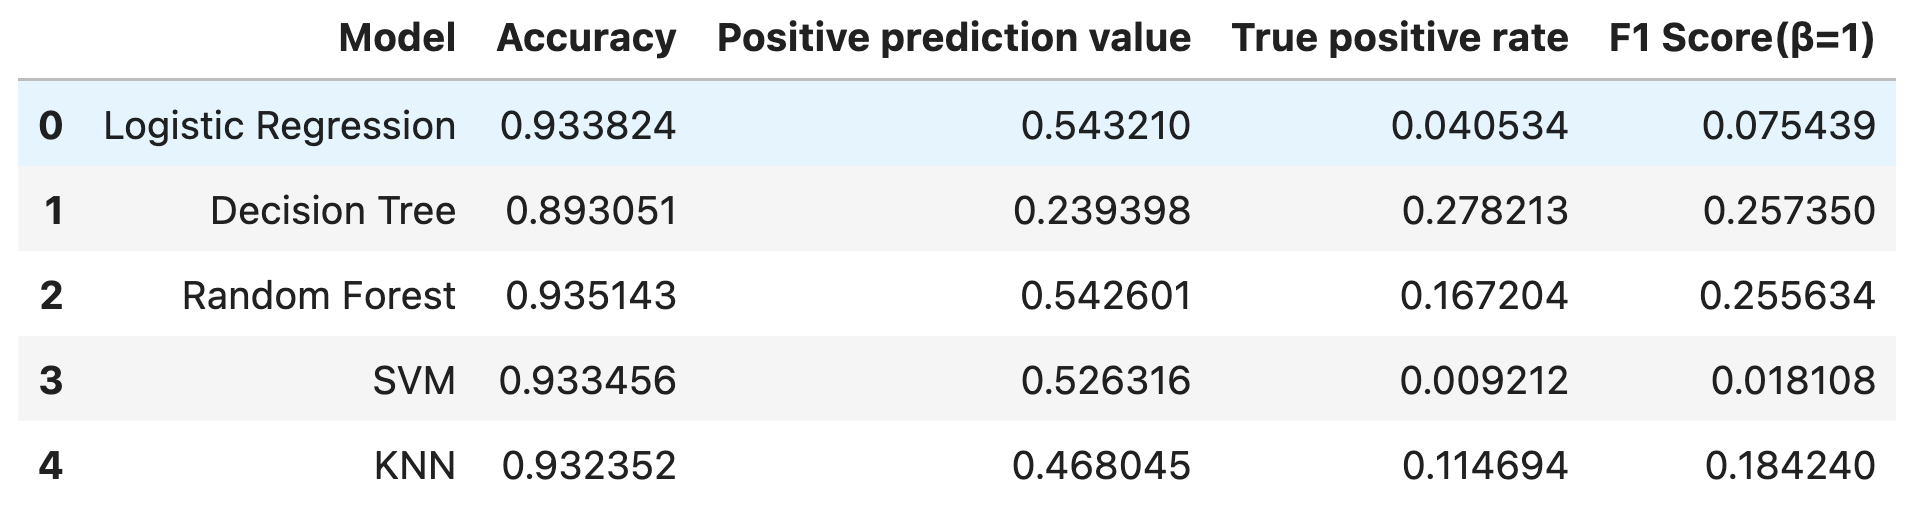

**结论：**
1. Decision Tree 和 SVM 对阈值的变化不敏感。
2. 其它三种的准确度（ACC）和精确度（PPV）都降低了，但灵敏度（TPR）都增高了。这很符合对“阈值降低”的期望：“宁可错杀一百，不能错过一个”。
3. <u>**最终依然推荐使用 Random Forest 模型**。